In [88]:
import pandas as pd

warnings.filterwarnings("ignore")

data = pd.read_csv('parkinsons.csv')
data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [89]:

print(data.isnull().sum())


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [90]:
data.drop(columns=['name'], inplace=True)

X = data.drop(columns=['status'])
y = data['status']


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']] = scaler.fit_transform(data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']])
data.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,0.571429,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,0.571429,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,0.571429,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,0.571429,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,0.571429,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


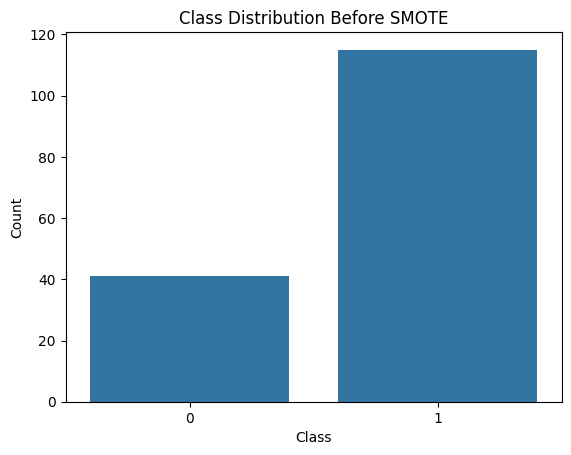

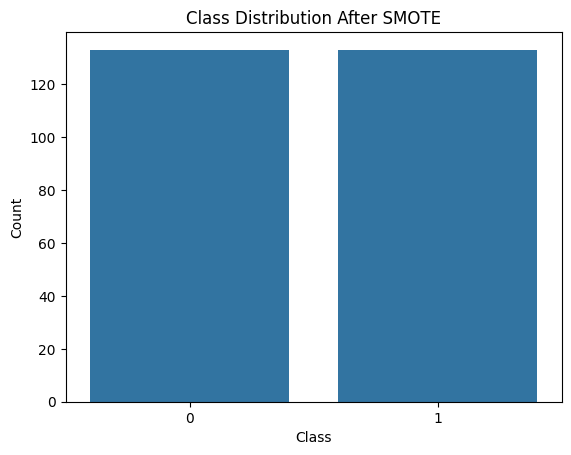

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

def plot_class_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

plot_class_distribution(y_train, "Class Distribution Before SMOTE")

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

plot_class_distribution(y_train_res, "Class Distribution After SMOTE")


In [94]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

base_models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('Log. Regression', LogisticRegression(max_iter=2000, random_state=42)),
    ('SVC', SVC(probability=True, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=200, max_depth=10, random_state=42))
]

meta_model = LogisticRegression(max_iter=2000, random_state=42)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked_model.fit(X_train_balanced, y_train_balanced)

y_pred_stacked = stacked_model.predict(X_test)
print(f"Stacked Accuracy: {accuracy_score(y_test, y_pred_stacked):.4f}")
print(classification_report(y_test, y_pred_stacked))


Stacked Accuracy: 0.9231
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [95]:
import matplotlib.pyplot as plt

base_model_accuracies = {}
for name, model in base_models:
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_base = model.predict(X_test)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred_base))

    base_model_accuracies[name] = accuracy_score(y_test, y_pred_base) * 100


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.94      0.91      0.92        32

    accuracy                           0.87        39
   macro avg       0.78      0.81      0.79        39
weighted avg       0.88      0.87      0.88        39

Classification Report for Log. Regression:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.90      0.88      0.89        32

    accuracy                           0.82        39
   

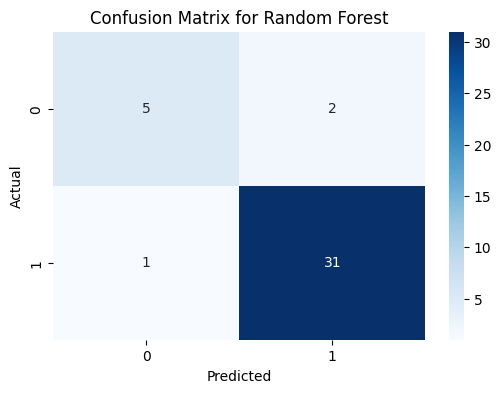

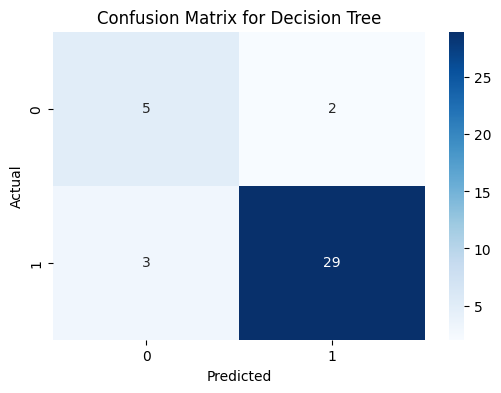

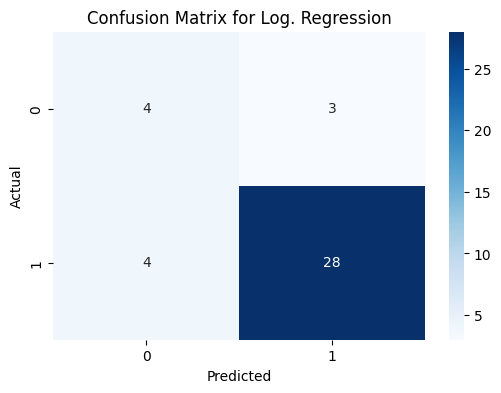

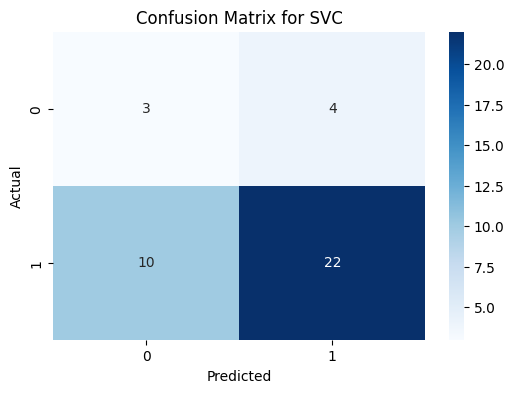

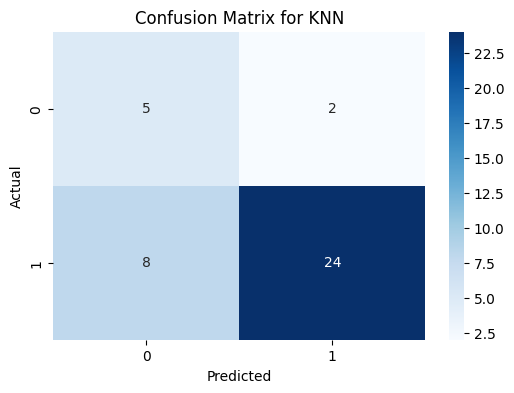

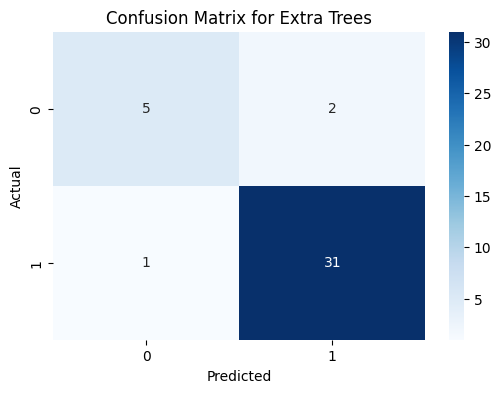

In [96]:
base_model_accuracies = {}
for name, model in base_models:
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_base = model.predict(X_test)


    conf_matrix = confusion_matrix(y_test, y_pred_base)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    base_model_accuracies[name] = accuracy_score(y_test, y_pred_base) * 100

Classification Report for Stacked:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



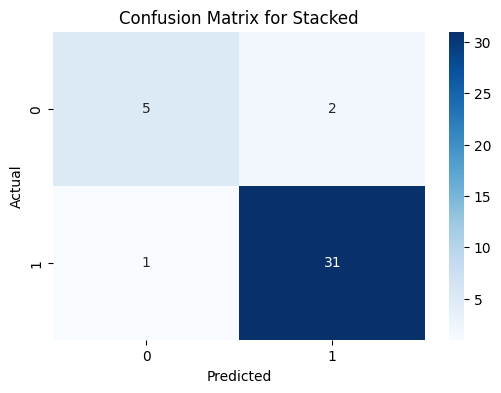

In [97]:
stacked_accuracy = accuracy_score(y_test, y_pred_stacked) * 100

base_model_accuracies['Stacked Model'] = stacked_accuracy

print(f"Classification Report for Stacked:")
print(classification_report(y_test, y_pred_stacked))

conf_matrix = confusion_matrix(y_test, y_pred_stacked)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for Stacked")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

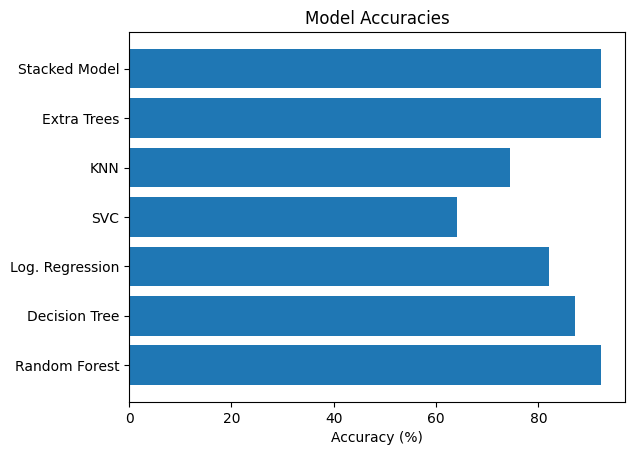

In [100]:
plt.barh(list(base_model_accuracies.keys()), list(base_model_accuracies.values()))
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.show()